# Hypotesetest

Jeg vil her gi et eksempel på en hypotesetest som tar utgangspunkt i
temperaturene i Bergen vi studerte i første uken av dette kurset.

Temperaturene ser ut til å ha økt i perioden vi har
målinger for. 

La oss gjette på at temperaturen har økt med mere enn en grad i
gjennomsnitt. 

Mere presist vil jeg gjøre utsagnet at på en tilfeldig kalenderdag
er temperaturen mere enn en grad høyere
enn den var på den samme kalenderdagen i året 40 år tidligere.

Jeg vil bruke de daglige temperaturmålingene i de siste 3652
dagene (de siste ti årene) og de 3652 dagene som var 40 år tidligere
for å teste denne hypotesen.

For $i = 1, \dots, 3652$ la $y_i$ være temperaturen for $i$ dager siden
minus temperaturen for $i$ dager og $40$ år siden. 

Mitt gjett er at
tallene $y_i$ er trukket fra en sannsynlighetsfordeling med gjennomsnitt $\mu$ og at
$\mu > \mu_0$ for $\mu_0 = 1 \ C^{\circ}$.

Jeg forventer at gjennomsnittet $E(y)$ av tallene $y_i$ er nær $\mu$, men jeg vil gjerne vite hvor stort det skal være for at jeg kan være rimelig sikker på at $\mu > \mu_0 = 1 \ C^{\circ}$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

**Antatt gjennomsnittsverdi** $\mu_0 = 1 \ C^{\circ}$

**Nullhypotese ($H_0)$:** $\mu = \mu_0$.

**Alternativ hypotese ($H_1$):** $\mu > \mu_0$.

*Det er statistisk konvensjon at nullhypotesen er $\mu = \mu_0$. Egentlig er det enklere å bruke $\mu \leq \mu_0$ som nullhypotese*

## Eksempler på sannsynlighetsfordelinger:

Et sannsynlighetsmål forteller hvor sannsynlig noe er. For eksempel hvor sannsynlig det er å slå to seksere på rad med en terning, 
eller hvor sannsynlig det er at en tilfeldig person i dette rommet er høyere en 190 cm.

Hvis sannsynlighetsmålet forteller om sannsynligheten av tallverdier, så har det et gjennomsnitt $\mu$.

At et tall er trukket fra en sannsynlighetsfordeling betyr at hvis vi trekker et tilfeldig utvalg av tall så vil tall med høy sannsynlighet bli trukket oftere enn tall med lav sannsynlighet. Hvor mye oftere er angitt av sannsynlighetsfordelingen.

### Sannsynlighetsfordeling for terningkast.

La oss si at vi har en svart og en hvit terning, og at vi gjør et eksperiment der kaster begge terningene samtidig. 

**Oppgave** Hva er sannsynligheten for at vi slår to seksere? Og for at vi slår en femmer og en sekser?

Sannsynlighetsfordelingen er illustrert i figuren under:

<img src="Dice_Distribution_(bar).svg" alt="image" width="600" height="auto">

(Tim Stellmach, Public domain, via Wikimedia Commons)

## Normalfordeling

Normalfordelingen kan beskrives vha forventningsverdien μ og standardavviket σ.

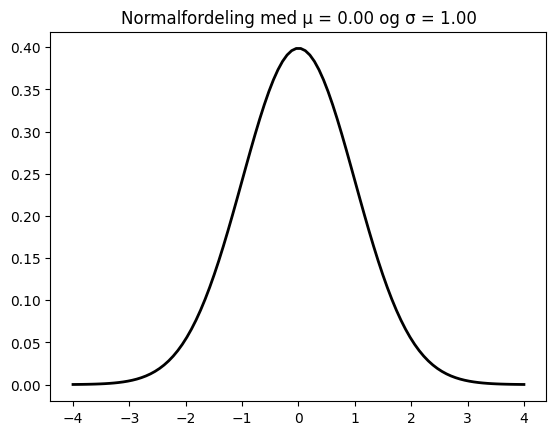

In [2]:
# Plotter normalfordeling gjennomsnitt 0 og standardavvik 1
xmin = -4
xmax = 4
mu, std = 0, 1
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

Når vi trekker ett tall fra normalfordelingen over er det mest sannsynlig å trekke ett tall nær $0$, og det er veldig lite sannsynlig å trekke ett tall som er stort. For eksempel større enn $4$.

## Temperaturdata

Vi laster inn temperaturdata og beregner forskjellen mellem temperatur på en kalenderdag og kalenderdagen 40 år tidliger for alle dager 10 år tilbake i tid

In [3]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [4]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t



In [5]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [6]:
import scipy.stats

In [7]:
scipy.stats.norm

In [8]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [9]:
# Vi angir GPS koordinatene til Bergen
# Google maps gir oss koordinatene under. Høyden gjetter jeg meg til.

bergen = meteostat.Point(60.38526, 5.328060, 10)

In [10]:
# Vi laster ned daglige målinger for den angitte tidsperioden

data = meteostat.Daily(bergen, start, end)
data = data.fetch()


In [11]:
# setter endedato til å være siste dag vi har data for
end = data.index[-1]

In [12]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
data['tavg_ffill'] = data['tavg'].ffill()

In [29]:
# Plotter daglige temperaturer og regresjonslinjen mot tid
y1 = data.loc[end - timedelta(days=int(365.24 * 10)): end]['tavg_ffill'].values 
y2 = data.loc[end - timedelta(days=(365.2425 * 10)) - timedelta(days=int(365.2425 * 40)): end - timedelta(days=int(365.2425 * 40))]['tavg_ffill'].values
y = y1 - y2

In [30]:
# Lager pandas dataframe med temperaturdifferanser. 
# Dette for å ha funksjonaliteten til pandas tilgjengelig.
data2 = pd.DataFrame(y, columns=['temperaturdifferanse'])

<Axes: >

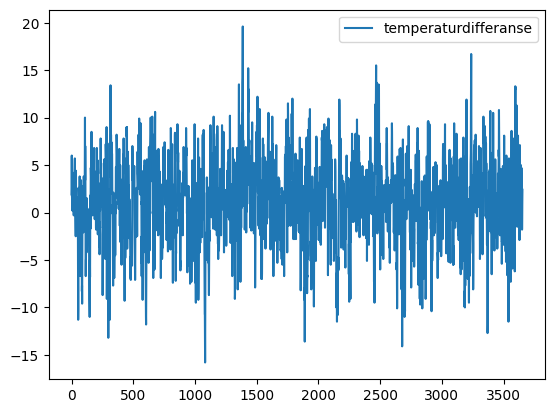

In [31]:
data2.plot(y=['temperaturdifferanse'])

## Normalfordeling

I mange situasjoner observerer vi noe som varierer av en sammensatt grunn. 

En typisk egenskap ved observasjoner som varierer av samensatte årsaker er at de ofte får en **normalfordeling**. 

Med mindre vi har spesiell grunn til å tro noe annet, så regner vi med at
observasjonene våre varier med en tilnærmet normalfordeling. 

Normalfordelingen har mange godt kjente
egenskaper. Den er f.eks. symetrisk rundt sin forventningsverdi, μ, og den streker seg uendelig langt
i begge retninger. 

Det er mest sannsynlig at vi gjør observasjoner i nærheten av forventningsverdien,
og det finnes en svært liten sannsynlighet for å observere et tall som ligger langt fra forventningsverdien.

Fordelingen kan beskrives vha forventningsverdien μ og standardavviket σ.

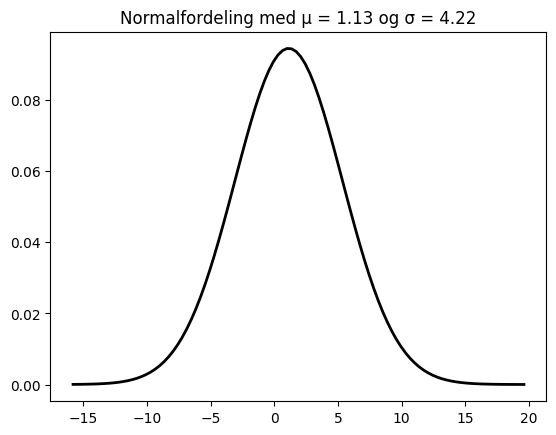

In [32]:
# Plotter normalfordeling med samme gjennomsnitt of standardavvik som observasjonene våre

xmin = np.min(y)
xmax = np.max(y)
mu, std = scipy.stats.norm.fit(data2['temperaturdifferanse'])
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

## Kriterier for hypotesetest

For å teste denne hypotesen vil jeg bruke en $t$-test. Jeg har ett
utvalg av temperaturforskjeller $y_1, \dots, y_{3652}$, og nullhypotesen
er at gjennomsnittet av disse tallene er lik $1 \ C^{\circ}$.

En forutsetning for å bruke en $t$-test er at målingene er
normalfordelte. Jeg vet ikke på forhånd om målingene er normalfordelte,
men jeg kan danne meg en formening om dette ved å se på et histogram av
målingene. Jeg kan finne normalfordelingskurven som passer best til
mitt data og sammenligne de to.

Hvis det ser bra ut kan jeg fortsette. Ellers må jeg finne en annen
metode eller en annen hypotese.

**Sjekker på data:**

Plotter først et histogram av data. 

(Teller hvor mange datapunkter i hvert delintervall i en oppdeling av intervallet av observerte verdier.)

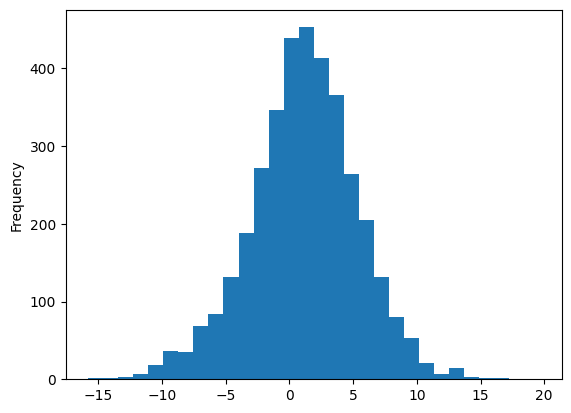

In [33]:
# Plotter histogram av temperaturdifferanser. 
data2['temperaturdifferanse'].plot.hist(bins=30)
xmin, xmax = plt.xlim()

Plotter deretter normalfordelinge med samme gjennomsnitt $E(y)$ og spredning $\sigma(y)$ som data opp på histogrammet for data. 

Jeg kan visuellt avgjøre om data ser ut som om data er normalfordelt. Her under ser data normalfordelt ut.

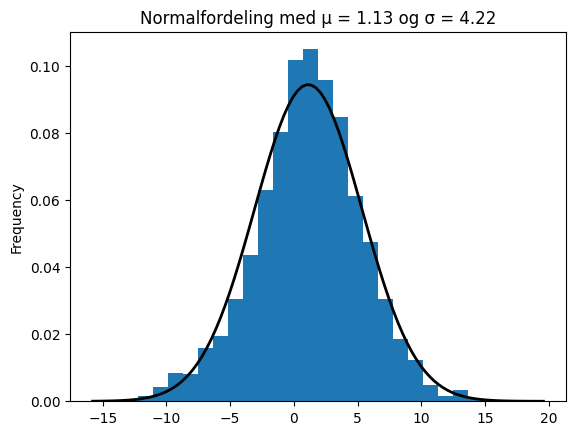

In [34]:
mu, std = scipy.stats.norm.fit(data2['temperaturdifferanse'])
data2['temperaturdifferanse'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin = np.min(y)
xmax = np.max(y)
#xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

Siden data ser normalfordelt ut kan jeg fortsette med å beregne $t$-verdien og
$p$-verdien. Formelen for $t$-verdien er
$$t\_\text{verdi} = \frac{E(y) - \mu_0}{\sigma(y)/\sqrt{n}},$$ hvor $\sigma$ er
standardavviket til målingene og $n$ er antall målinger.

Vi kan se på t-verdien som en funksjon av gjennomsnittet og sette

$$f(x) = \frac{\mu - \mu_0}{\sigma(y)/\sqrt{n}} - x.$$

Da er $t\_\text{verdi} = f(0)$, og dersom data er trukker fra en normalfordeling er funkjsonen 

In [39]:
# gjennomsnitt og standardavvik
Ey, sigmay = np.mean(y), np.std(y)

In [40]:
t_verdi = (Ey - 1)/(sigmay / np.sqrt(len(y)))

In [41]:
t_verdi

np.float64(1.9090855371048205)

Teorien for normalfordelte observasjoner forutsier at $t$-verdien vi nettopp beregnet vil fordele seg etter en $t$-fordeling med $n-1$ frihetsgrader.

$t$-fordelingen er tilnærmet lik normalfordelingen med standardavvik $1$ og gjennomsnitt $0$ når antallet av frihetsgrader er stort.

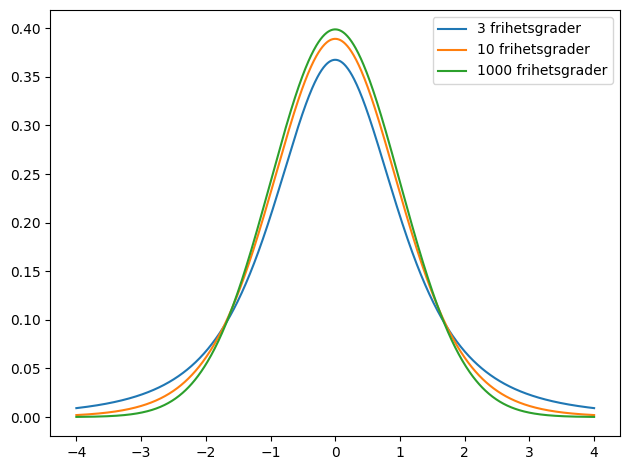

In [42]:
# Antall frihetsgrader
dfs = [3, 10, 1000]

# Sett opp verdier for x-aksen
x = np.linspace(-4, 4, 1000)

alpha = 0.05  # Signifikansnivå

for df in dfs:
    yy = scipy.stats.t.pdf(x, df)  # t-fordeling med 10 frihetsgrader
    plt.plot(x, yy, label=f'{df} frihetsgrader')

# y = norm.pdf(x)
# plt.plot(x, y + 0.002)

plt.legend()
plt.tight_layout()
plt.show()


## Overgang fra t-verdi til sannsynlighet, eller p-verdi

Vi antar at temperaturen $y$ er fordelt etter en normalfordeling med gjennomsnittsverdi $\mu$.

Gitt en $t$-verdien $t\_\text{verdi}$ og antallet av frihetsgrader kan vi finne sannsynligheten for at $\mu \le \mu_0$ og sannsynligheten for at $\mu > \mu_0$.

Hvis sannsynligheten for at $\mu \le \mu_0$ er veldig liten velger vi å forkaste nullhypotesen. 

Vi må på forhånd bestemme oss for hva vi mener med veldig liten. 

Et typisk valg er "mindre en 5%".

I vårt tilfelle er $t\_\text{verdi}$ og antall frihetsgrader gitt ved:

In [44]:
antall_frihetsgrader = len(y) - 1
float(t_verdi), antall_frihetsgrader

(1.9090855371048205, 3652)

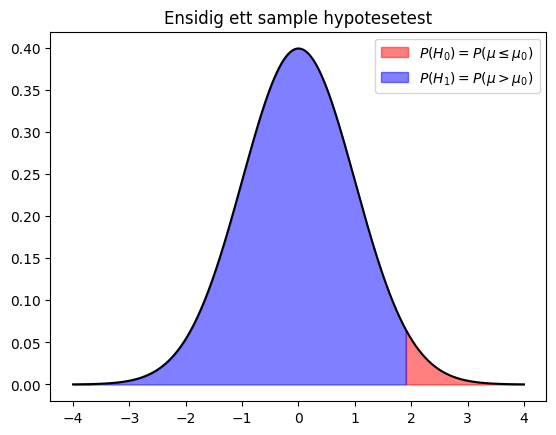

In [72]:
# Antall frihetsgrader
df = antall_frihetsgrader

# Sett opp verdier for x-aksen
x = np.linspace(-4, 4, 1000)
y = scipy.stats.t.pdf(x, df)  # t-fordeling med 10 frihetsgrader

# alpha = 0.05  # Signifikansnivå
t_crit = t_verdi
#t_crit = scipy.stats.t.ppf(1 - alpha, df)  # Kritisk verdi for ensidig test
#t_crit_two_sided = scipy.stats.t.ppf(1 - alpha / 2 , df) # Kritisk verdi for tosidig test


# Ensidig test: μ < μ0 (venstre hale)
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(x > t_crit), color='red', alpha=0.5, label=r'$P(H_0) = P(\mu \leq \mu_0$)')
plt.fill_between(x, y, where=(x < t_crit), color='blue', alpha=0.5, label=r'$P(H_1) = P(\mu > \mu_0$)')
plt.title(r"Ensidig ett sample hypotesetest")
plt.legend()
plt.show()


Nullhypotesen $\mu = \mu_0$ (eller $\mu \le \mu_0$) forkastes når sannsynligheten for alternativ hypotese $H_1$: $\mu > \mu_0$ er minst $95 \%$. Det er det samme som at sannsynligheten for $H_0$ er høyst $5 \%$.

I gitt fall sier vi at nullhypotesen forkastes med $5 \%$ signifikansnivå.

In [73]:
p_verdi = scipy.stats.t.cdf(-t_verdi, antall_frihetsgrader)

In [76]:
#vi får p-verdien

float(100 * p_verdi)

2.81646771444889

Vi kan altså forkaste nullhypotesen at temperaturen i Bergen ikke er steget med mere enn en grad celsius med 2.8% signifikansnivå.

**Konklusjon:**

Temperaturen i Bergen er steget med mere enn en grad per 40 år.

I neste og siste forelesning vil vi se om vi kan komme til samme konklusjon ved å gjøre en t-test på stignigstallet i regresjonslinjen vi fant for disse temperaturdata.